# Using Clustering to build mood based playlists

In [11]:
# Required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

### Collecting data
 See https://colab.research.google.com/drive/1-c-F9BTy2W2PkuArX0S4Rbp_kNhwB8rI#scrollTo=zI_yPGEItOYD for notebook on importing and collecting data

In [12]:
# Import and merge data (Each call can only take 2000 songs so merge last 5 years)
tmp1 = pd.read_csv('data/spotify_data_2020.csv')
tmp2 = pd.read_csv('data/spotify_data_2019.csv')
tmp3 = pd.read_csv('data/spotify_data_2018.csv')
tmp4 = pd.read_csv('data/spotify_data_2017.csv')
tmp5 = pd.read_csv('data/spotify_data_2016.csv')

frames = [tmp1,tmp2,tmp3,tmp4,tmp5]

df = pd.concat(frames).drop_duplicates().reset_index(drop=True) 
df = df.drop(columns=['Unnamed: 0'])
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,99,0.700,0.722,7,-3.558,0,0.0369,0.221,0.0,0.2720,0.756,90.989,140526,4
1,Ariana Grande,34+35,6Im9k8u9iIzKMrmV7BWtlF,97,0.830,0.585,0,-6.476,1,0.0940,0.237,0.0,0.2480,0.485,109.978,173711,4
2,Ariana Grande,positions,35mvY5S1H3J2QZyna3TFe0,99,0.737,0.802,0,-4.771,1,0.0878,0.468,0.0,0.0931,0.682,144.015,172325,4
3,CJ,Whoopty,5vGLcdRuSbUhD8ScwsGSdA,96,0.711,0.598,3,-7.621,0,0.1820,0.190,0.0,0.1500,0.737,140.175,123429,4
4,The Kid LAROI,WITHOUT YOU,27OeeYzk6klgBh83TSvGMA,96,0.662,0.413,0,-7.357,1,0.0299,0.213,0.0,0.1340,0.467,93.005,161385,4


In [14]:
# shape of the dataset
print("Data Frame Dimensions:")
print("Lines:\t\t{}".format(df.shape[0]))
print("Columns:\t{}".format(df.shape[1]))

# Verify no missing data
print(df.info())

Data Frame Dimensions:
Lines:		9702
Columns:	17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9702 entries, 0 to 9701
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       9702 non-null   object 
 1   track_name        9702 non-null   object 
 2   track_id          9702 non-null   object 
 3   popularity        9702 non-null   int64  
 4   danceability      9702 non-null   float64
 5   energy            9702 non-null   float64
 6   key               9702 non-null   int64  
 7   loudness          9702 non-null   float64
 8   mode              9702 non-null   int64  
 9   speechiness       9702 non-null   float64
 10  acousticness      9702 non-null   float64
 11  instrumentalness  9702 non-null   float64
 12  liveness          9702 non-null   float64
 13  valence           9702 non-null   float64
 14  tempo             9702 non-null   float64
 15  duration_ms       9702 non-null   int64  

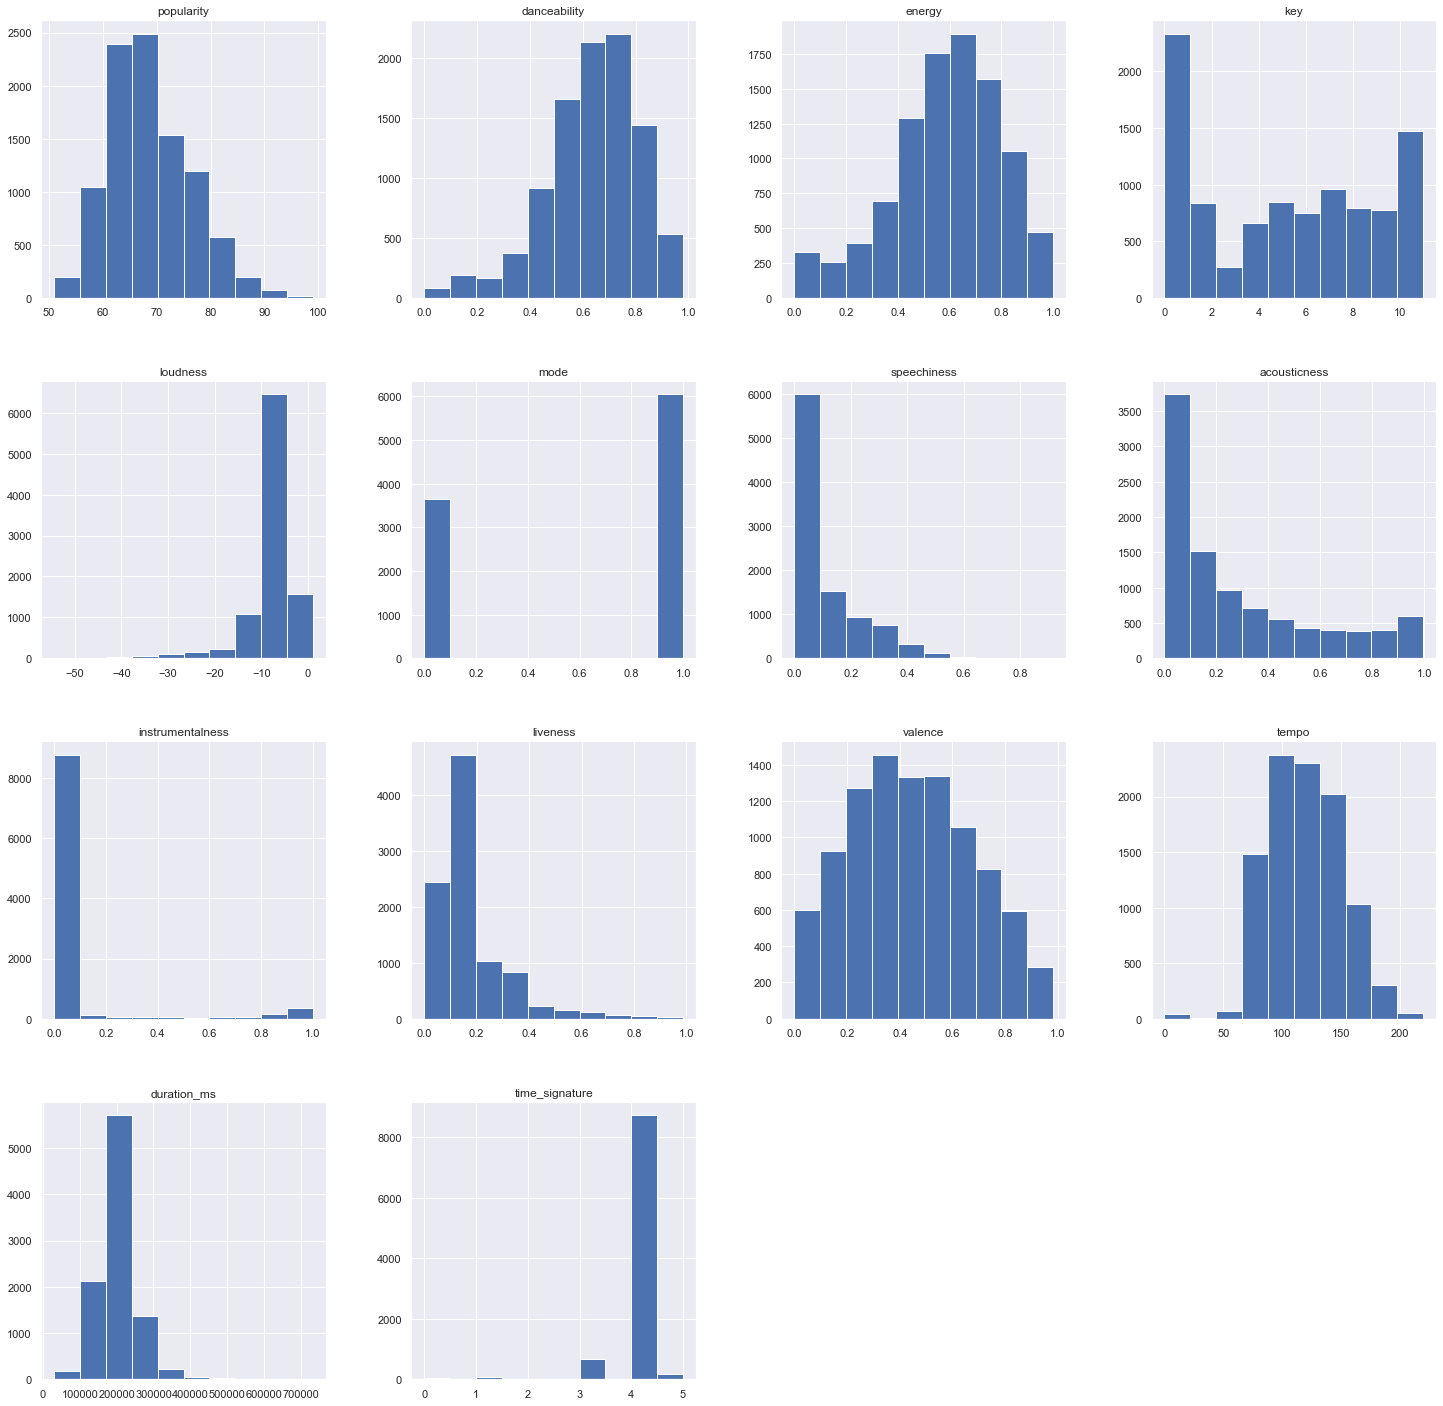

In [15]:
# Take a look at how the data is
df.hist(figsize=(25,25));

In [16]:
# statistical distribution of categorical values
df.describe(include="O")


,artist_name,track_name,track_id
count,9702,9702,9702
unique,2885,9046,9702
top,BTS,Alone,56dDonzTxrZKWuVDqUOYGd
freq,96,10,1


BTS Most common artist in the dataframe

In [17]:
# checking most recurrent artists in Brazil
n = 10
print("Most Popular Artists")
df['artist_name'].value_counts()[:n]

Most Popular Artists


BTS                           96
Drake                         78
Bad Bunny                     70
Taylor Swift                  68
Juice WRLD                    67
Lil Uzi Vert                  63
YoungBoy Never Broke Again    62
Future                        61
Ariana Grande                 60
Playboi Carti                 58
Name: artist_name, dtype: int64

## Building a correlation matrix to take a look at the data

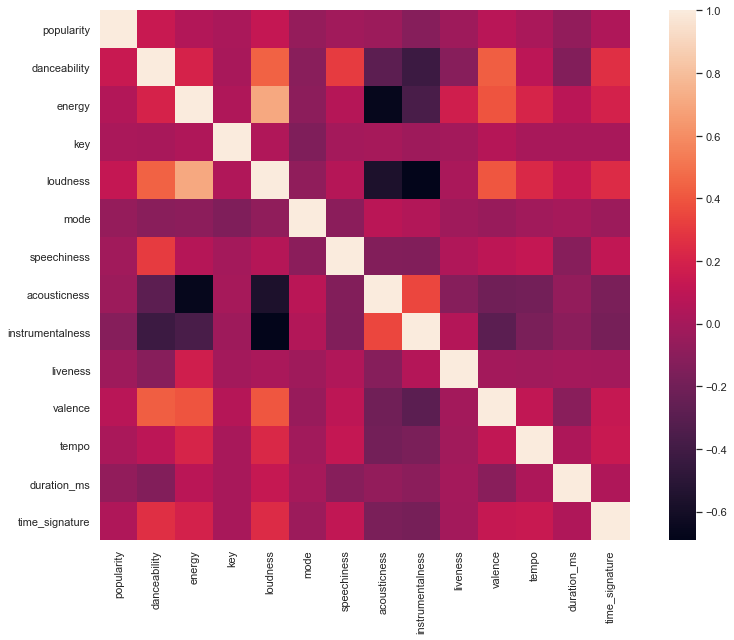

In [19]:
# creating a correlation matrix
corr = df.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

Predictive correlation between different variables

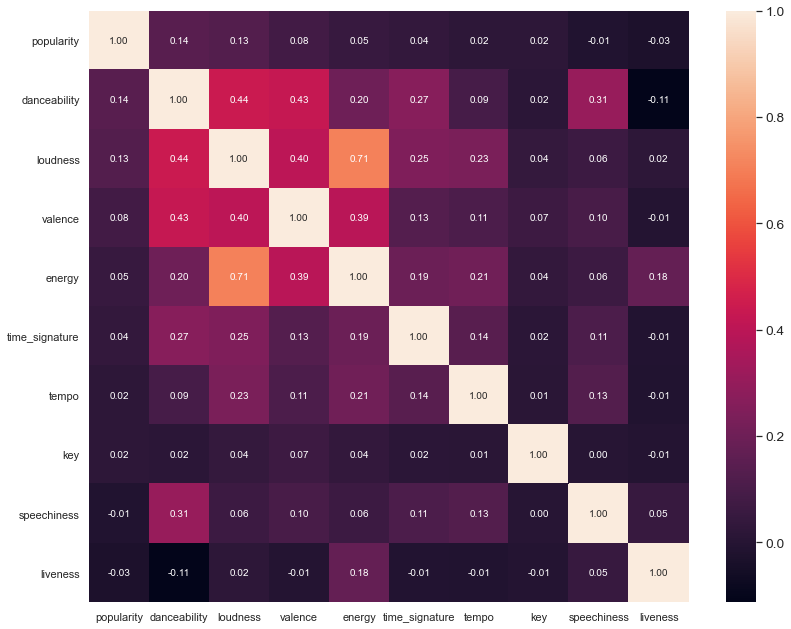

In [20]:
# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()


# TODO: Investigate data from here